## 1. Naive Counts vs True Gene Counts Plot

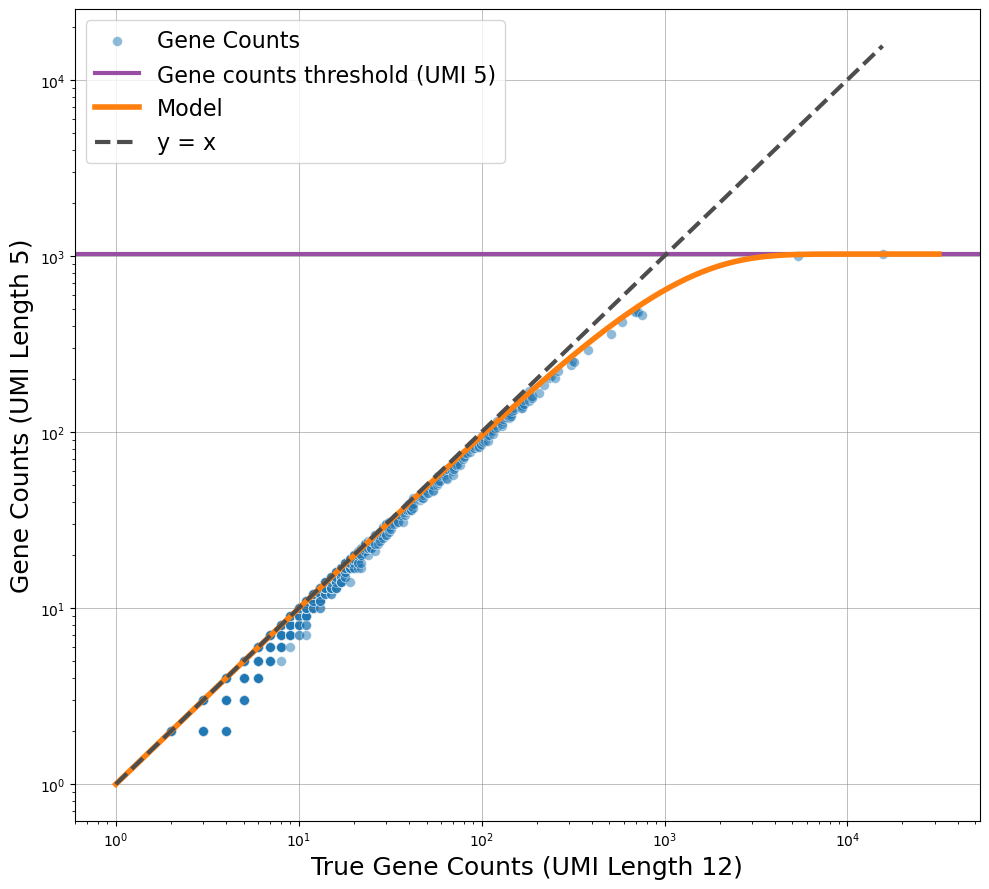

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scanpy as sc

# directory = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/"  # Directory for 1k_PBMCs
directory = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/"  # Directory for 1k_PBMCs


# directory = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/"    # Directory for 10k PBMCS
# directory = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ur_objects/adata_matrices/"

adata_dict = {}
for i in range(1, 13):
    adata_dict[i] = sc.read_h5ad(directory + f"adata_{i}.h5ad")
    
    
# Your model function
def f(n_vals, j):
    return 4**j * (1 - (1 - 1 / 4**j)**n_vals)

# Fixed UMI length for "true" counts
i = 12
j = 5  # Fixed comparison UMI length
barcode = "CTACAGACAACAAAGT-1"
n_values = np.logspace(0, 4.5, 200)

# Output directory
# save_dir = "/data/dagyeman/cellranger/bam_file_analysis/figures_ur/counts_plots/naive"
# os.makedirs(save_dir, exist_ok=True)

# Find the barcode index
index_i = np.where(adata_dict[i].obs_names == barcode)[0][0]
index_j = np.where(adata_dict[j].obs_names == barcode)[0][0]

# Extract and process counts
gene_counts_i = adata_dict[i].X[index_i].flatten()
gene_counts_j = adata_dict[j].X[index_j].flatten()

mask = gene_counts_i >= 1
gene_counts_i = gene_counts_i[mask]
gene_counts_j = gene_counts_j[mask]

sorted_idx = np.argsort(gene_counts_i)
sorted_gene_counts_i = gene_counts_i[sorted_idx] + 1
sorted_gene_counts_j = gene_counts_j[sorted_idx] + 1

# Create plot
plt.figure(figsize=(10, 9))
plt.scatter(sorted_gene_counts_i, sorted_gene_counts_j, alpha=0.5, 
            c='#1f77b4', edgecolors='w', s=50, linewidth=0.5, label='Gene Counts')

y_asymptotic_value = 4**j
plt.axhline(y=y_asymptotic_value, color='#984ea3', linestyle='-', linewidth=3, label=f'Gene counts threshold (UMI {j})')

model_vals = f(n_values, j)
plt.plot(n_values, model_vals, color='#ff7f0e', linewidth=4, label='Model')

max_val = max(sorted_gene_counts_i.max(), sorted_gene_counts_i.max())
plt.plot([1, max_val], [1, max_val], linestyle='--', color='#4D4D4D', linewidth=3, label='y = x')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('True Gene Counts (UMI Length 12)', fontsize=18)
plt.ylabel(f'Gene Counts (UMI Length {j})', fontsize=18)
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.7)
plt.legend(fontsize=16)
plt.tight_layout()

plt.show()



## 2. Predicted Counts vs. True Gene Counts Plot

AnnData object with n_obs × n_vars = 1232 × 28227


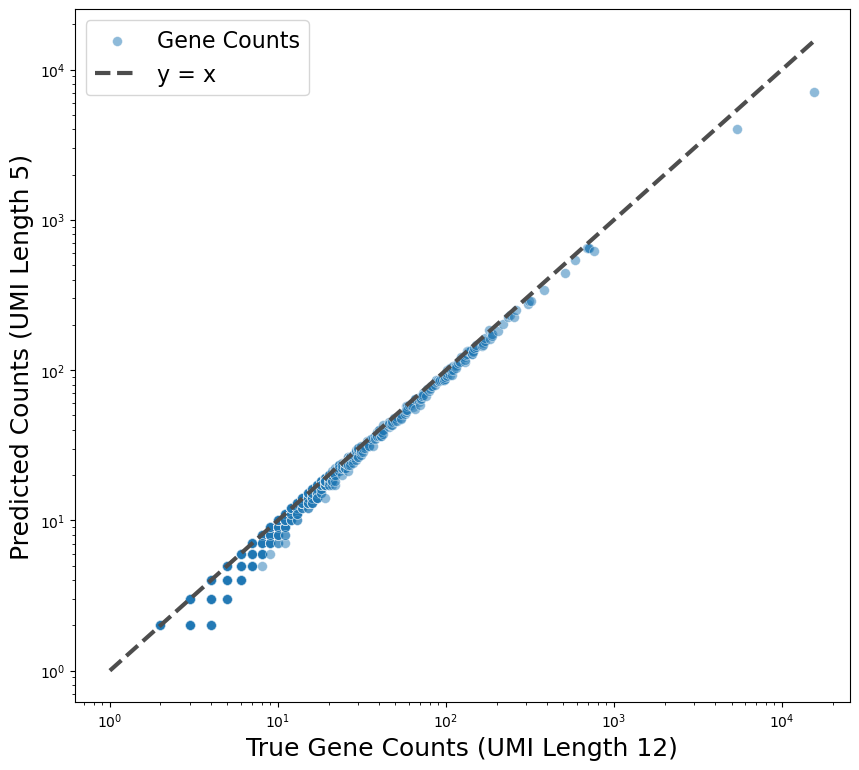

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd


# directory = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/inverted2_adata_matrices/"  # Directory for 1k_PBMCs
directory = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/inverted2_adata_matrices/"  # Directory for 1k_PBMCs


# directory = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/inverted2_adata_matrices/"    # Directory for 10k PBMCS

adata_dict = {}
for i in range(1, 13):
    adata_dict[i] = sc.read_h5ad(directory + f"adata_inverted_{i}.h5ad")
    
print(adata_dict[6])


# Load the ground truth vector 

# adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/adata_12.h5ad")
adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/adata_12.h5ad")


# adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ub_objects/adata_matrices/adata_12.h5ad")
# adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/ur_objects/adata_matrices/adata_12.h5ad")



# Define the function f(n, 4^j) = 4^j * (1 - (1 - 1/4^j)^n)
def f(n_vals, j):
    results = []
    for n in n_vals:
        result = 4**j * (1 - (1 - 1 / 4**j)**n)
        results.append(result) 
    return np.array(results)

# Define parameters
n_values = np.logspace(0, 4.5, 200)  # Example values for n (or x)
barcode = "CTACAGACAACAAAGT-1"  # 1k dataset
# barcode = "CAGATTGCAGAGTGAC-1"  # 10k dataset 

j = 5  # Fixed j value

# Find the index of the barcode in each AnnData object
index1 = np.where(adata_12.obs_names == barcode)[0][0]
index2 = np.where(adata_dict[j].obs_names == barcode)[0][0]

# Extract the gene counts for the barcode from both AnnData objects
gene_counts1 = adata_12.X[index1].flatten()  # Gene counts for UMI length 12
gene_counts2 = adata_dict[j].X[index2].flatten()  # Gene counts for UMI length j

# Create a boolean mask for gene_counts1 that are greater than or equal to 1
mask = gene_counts1 >= 1 

# Apply the mask to filter gene_counts1 and the corresponding values in gene_counts2
gene_counts1 = gene_counts1[mask]
gene_counts2 = gene_counts2[mask]

# Sort the gene counts based on gene_counts1
sorted_indices = np.argsort(gene_counts1)
sorted_gene_counts1 = gene_counts1[sorted_indices]
sorted_gene_counts2 = gene_counts2[sorted_indices]

# Add 1 to both sorted_gene_counts1 and sorted_gene_counts2 to handle log scale properly
sorted_gene_counts1 = sorted_gene_counts1 + 1
sorted_gene_counts2 = sorted_gene_counts2 + 1

# Create the scatter plot
plt.figure(figsize=(10, 9))
plt.scatter(sorted_gene_counts1, sorted_gene_counts2, alpha=0.5, c='#1f77b4', edgecolors='w', s=50, linewidth=0.5, label='Gene Counts')

# Adding the identity line
max_val = max(sorted_gene_counts1.max(), sorted_gene_counts2.max())
plt.plot([1, max_val], [1, max_val], linestyle='--', color='#4D4D4D', linewidth=3, label='y = x')

# Calculate function values for plotting
f_n_4j = f(n_values, j)

# Uncomment to plot model or asymptotic line if needed
# y_asymptotic_value = 4**j
# plt.axhline(y=y_asymptotic_value, color='purple', linestyle='-', linewidth=3, label=f'Gene counts threshold (UMI {j})')
# plt.plot(n_values, f_n_4j, 'g-', linewidth=4, label="Model")

# Log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Labels and legend
plt.xlabel('True Gene Counts (UMI Length 12)', fontsize=18)
plt.ylabel(f'Predicted Counts (UMI Length {j})', fontsize=18)
# plt.title(f'Inverted Plot vs. Ground Truth (UMI {j})')
plt.legend(fontsize=16)

plt.show()


## 3. MSE AND MAE PLOTS

Ground Truth adata_12:
AnnData object with n_obs × n_vars = 1232 × 28227
Model Dataset (inverted), example adata_dict_model[6]:
AnnData object with n_obs × n_vars = 1232 × 28227
Naive Dataset, example adata_dict_naive[6]:
AnnData object with n_obs × n_vars = 1232 × 28227


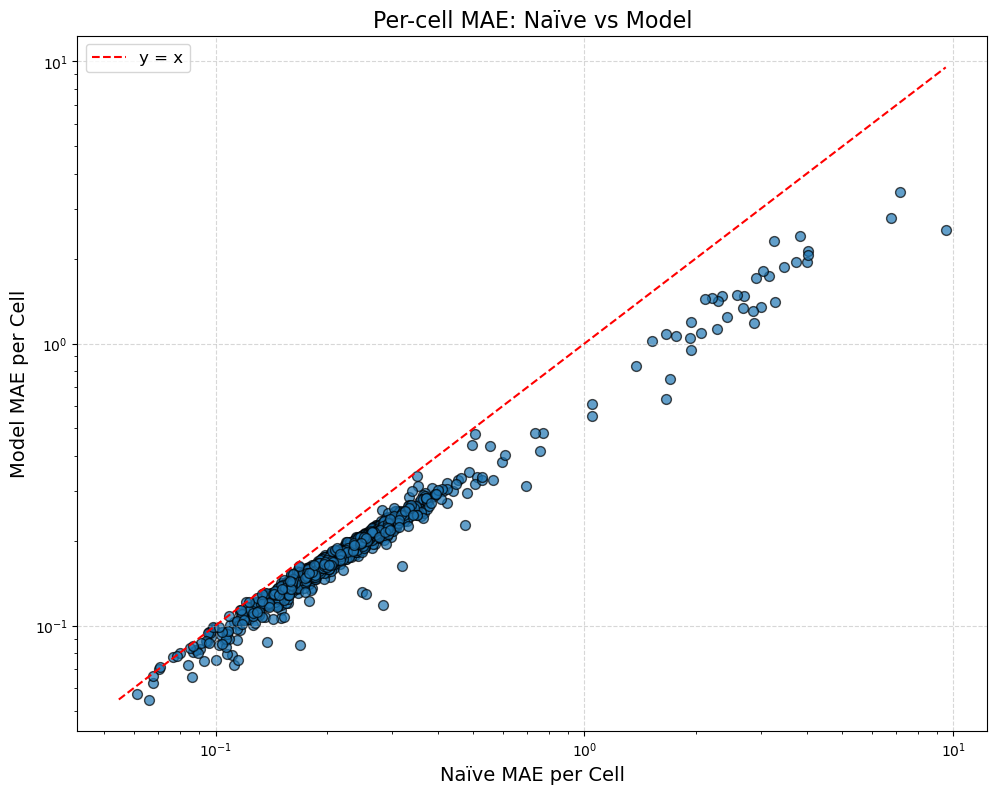

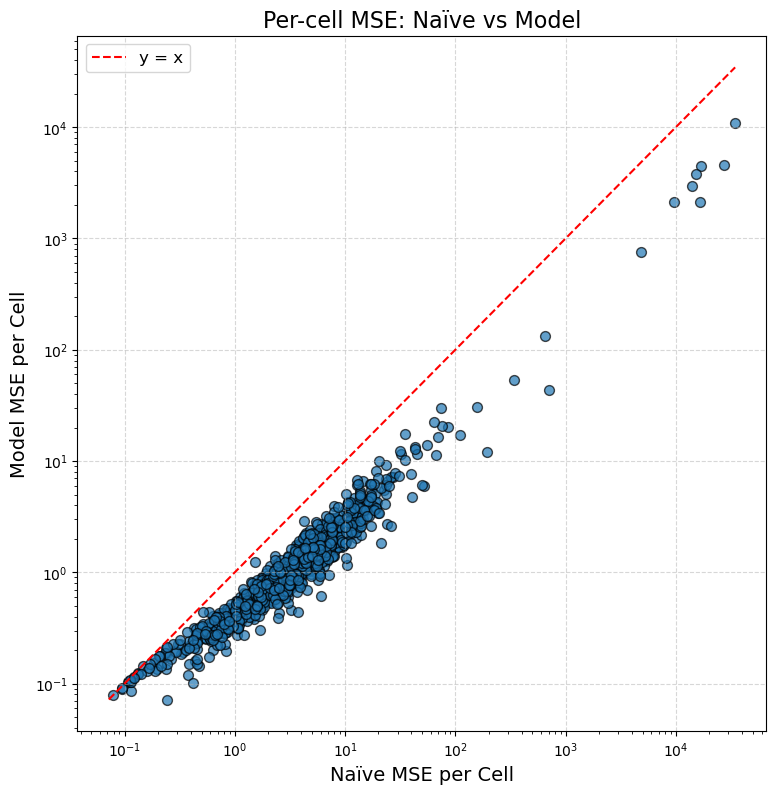

In [4]:
import scanpy as sc
import numpy as np

# --- Function Definitions ---
def calculate_mae(actual, predicted):
    """Calculate Mean Absolute Error (MAE) between two arrays."""
    return np.mean(np.abs(actual - predicted))

def calculate_mse(actual, predicted):
    """Calculate Mean Squared Error (MSE) between two arrays."""
    return np.mean((actual - predicted) ** 2)

def f(n_vals, j):
    """Transformation: f(n, 4^j) = 4^j * (1 - (1 - 1/4^j)^n)."""
    return 4**j * (1 - (1 - 1 / 4**j)**n_vals)

# --- Parameters ---
i = 12  # UMI length for ground truth
j = 5   # UMI length for comparison

# --- Load Datasets ---
# Ground truth dataset (UMI length 12)
# adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/adata_12.h5ad")
adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/adata_12.h5ad")
print("Ground Truth adata_12:")
print(adata_12)

# Inverted dataset for model MAE and MSE (UMI lengths 1-12)
# model_dir = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/inverted2_adata_matrices/"
model_dir = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/inverted2_adata_matrices/"
adata_dict_model = {idx: sc.read_h5ad(model_dir + f"adata_inverted_{idx}.h5ad") for idx in range(1, 13)}
print("Model Dataset (inverted), example adata_dict_model[6]:")
print(adata_dict_model[6])

# Naive dataset (UMI lengths 1-12)
# naive_dir = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/"
naive_dir = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/"
adata_dict_naive = {idx: sc.read_h5ad(naive_dir + f"adata_{idx}.h5ad") for idx in range(1, 13)}
print("Naive Dataset, example adata_dict_naive[6]:")
print(adata_dict_naive[6])

# --- Compute Per-cell MAE for the Model Approach ---
mae_model_vector = []
for barcode in adata_12.obs_names:
    if barcode in adata_dict_model[j].obs_names:
        idx_12 = np.where(adata_12.obs_names == barcode)[0][0]
        idx_j = np.where(adata_dict_model[j].obs_names == barcode)[0][0]
        gene_counts_12 = adata_12.X[idx_12].flatten()
        gene_counts_j = adata_dict_model[j].X[idx_j].flatten()
        mask = gene_counts_12 >= 1
        true_counts = gene_counts_12[mask] + 1  # Adjust for log scale
        predicted_counts = gene_counts_j[mask] + 1  # Adjust for log scale
        
        mae_model_vector.append(calculate_mae(true_counts, predicted_counts))
mae_model_vector = np.array(mae_model_vector)
# print("Per-cell Model MAE Vector:")
# print(mae_model_vector)

# --- Compute Per-cell MSE for the Model Approach ---
mse_model_vector = []
for barcode in adata_12.obs_names:
    if barcode in adata_dict_model[j].obs_names:
        idx_12 = np.where(adata_12.obs_names == barcode)[0][0]
        idx_j = np.where(adata_dict_model[j].obs_names == barcode)[0][0]
        gene_counts_12 = adata_12.X[idx_12].flatten()
        gene_counts_j = adata_dict_model[j].X[idx_j].flatten()
        mask = gene_counts_12 >= 1
        true_counts = gene_counts_12[mask] + 1  # Adjust for log scale
        predicted_counts = gene_counts_j[mask] + 1  # Adjust for log scale
        
        mse_model_vector.append(calculate_mse(true_counts, predicted_counts))
mse_model_vector = np.array(mse_model_vector)
# print("Per-cell Model MSE Vector:")
# print(mse_model_vector)

# --- Compute Per-cell MAE for the Naive Approach ---
naive_mae_vector = []
for barcode in adata_dict_naive[i].obs_names:
    if barcode in adata_dict_naive[j].obs_names:
        idx_i = np.where(adata_dict_naive[i].obs_names == barcode)[0][0]
        idx_j = np.where(adata_dict_naive[j].obs_names == barcode)[0][0]
        gene_counts_i = adata_dict_naive[i].X[idx_i].flatten()
        gene_counts_j = adata_dict_naive[j].X[idx_j].flatten()
        mask = gene_counts_i >= 1
        true_counts = gene_counts_i[mask] + 1  # Adjust for log scale
        naive_counts = gene_counts_j[mask] + 1  # Adjust for log scale
        naive_mae_vector.append(calculate_mae(true_counts, naive_counts))
naive_mae_vector = np.array(naive_mae_vector)
# print("Per-cell Naive MAE Vector:")
# print(naive_mae_vector)

# --- Compute Per-cell MSE for the Naive Approach ---
naive_mse_vector = []
for barcode in adata_dict_naive[i].obs_names:
    if barcode in adata_dict_naive[j].obs_names:
        idx_i = np.where(adata_dict_naive[i].obs_names == barcode)[0][0]
        idx_j = np.where(adata_dict_naive[j].obs_names == barcode)[0][0]
        gene_counts_i = adata_dict_naive[i].X[idx_i].flatten()
        gene_counts_j = adata_dict_naive[j].X[idx_j].flatten()
        mask = gene_counts_i >= 1
        true_counts = gene_counts_i[mask] + 1  # Adjust for log scale
        naive_counts = gene_counts_j[mask] + 1  # Adjust for log scale
        naive_mse_vector.append(calculate_mse(true_counts, naive_counts))
naive_mse_vector = np.array(naive_mse_vector)
# print("Per-cell Naive MSE Vector:")
# print(naive_mse_vector)



import matplotlib.pyplot as plt

# --- MAE Plot ---
plt.figure(figsize=(10, 8))
plt.scatter(naive_mae_vector, mae_model_vector, alpha=0.7, edgecolor='k', s=50)
plt.xlabel("Naïve MAE per Cell", fontsize=14)
plt.ylabel("Model MAE per Cell", fontsize=14)
plt.title("Per-cell MAE: Naïve vs Model", fontsize=16)

# Identity line for reference
min_val = min(naive_mae_vector.min(), mae_model_vector.min())
max_val = max(naive_mae_vector.max(), mae_model_vector.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')

# Save the MAE plot image
# plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/figures_ub/mae_mse_plots/1k_per_cell_mae_naive_vs_model.pdf")
# plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/figures_ur/mae_mse_plots/1k_per_cell_mae_naive_vs_model.pdf")
plt.show()

# --- MSE Plot ---
plt.figure(figsize=(8, 8))
plt.scatter(naive_mse_vector, mse_model_vector, alpha=0.7, edgecolor='k', s=50)
plt.xlabel("Naïve MSE per Cell", fontsize=14)
plt.ylabel("Model MSE per Cell", fontsize=14)
plt.title("Per-cell MSE: Naïve vs Model", fontsize=16)

# Identity line for reference
min_val = min(naive_mse_vector.min(), mse_model_vector.min())
max_val = max(naive_mse_vector.max(), mse_model_vector.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')

# Save the MSE plot image
# plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/figures_ub/mae_mse_plots/1k_per_cell_mse_naive_vs_model.pdf")
# plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/figures_ur/mae_mse_plots/1k_per_cell_mse_naive_vs_model.pdf")
plt.show()

## 4. TVD PLOTs

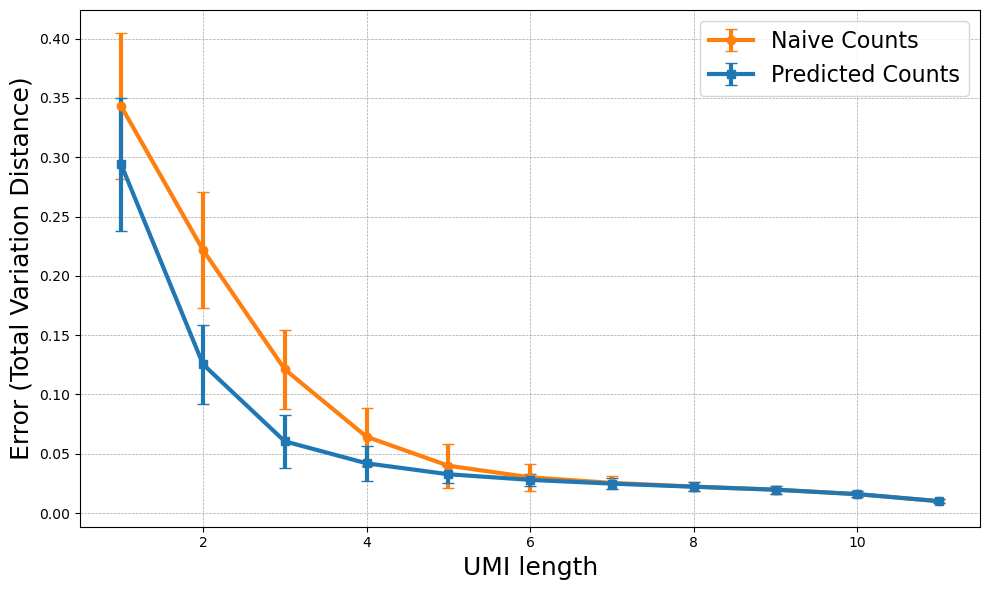

In [5]:
import numpy as np
import scanpy as sc

def tvd(p, q):
    """
    Calculate the Total Variation Distance (TVD) between two probability distributions p and q.
    Assumes that p and q are numpy arrays with the same length.
    """
    p = np.array(p, dtype=np.float64)
    q = np.array(q, dtype=np.float64)
    
    # Check for NaN or infinite values in p and q
    if np.isnan(p).any() or np.isinf(p).any():
        raise ValueError("Input array p contains NaN or infinite values.")
    if np.isnan(q).any() or np.isinf(q).any():
        raise ValueError("Input array q contains NaN or infinite values.")
    
    # Check if sums are zero to avoid division by zero
    sum_p = np.sum(p)
    sum_q = np.sum(q)
    if sum_p == 0 or sum_q == 0:
        raise ValueError("Sum of the input arrays should not be zero.")
    
    # Ensure both vectors are normalized
    p = p / sum_p
    q = q / sum_q
    
    # Compute the Total Variation Distance
    return 0.5 * np.sum(np.abs(p - q))

# Loading the regular adata matrices
# common_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices"
common_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices"
regular_adata_dict = {}
for i in range(1, 13):
    path = f"{common_path}/adata_{i}.h5ad"
    regular_adata_dict[i] = sc.read_h5ad(path)

# Loading the inverted adata matrices
# common_path2 = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/inverted2_adata_matrices"
common_path2 = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/inverted2_adata_matrices"
inverted_adata_dict = {}
for i in range(1, 13):
    path = f"{common_path2}/adata_inverted_{i}.h5ad"
    inverted_adata_dict[i] = sc.read_h5ad(path)

# This is the ground truth adata matrix
gt_adata12 = regular_adata_dict[12]

# Initialize lists to store the mean and standard deviation of errors
mean_errors = []
std_errors = []
mean_errors2 = []
std_errors2 = []

# Compute TVD for regular and inverted matrices against the ground truth
for i in range(1, 13):
    # Errors for regular matrices
    errors = []
    for barcode in gt_adata12.obs_names:
        index1 = np.where(regular_adata_dict[i].obs_names == barcode)[0][0]
        index_gt = np.where(gt_adata12.obs_names == barcode)[0][0]
        
        # Extract gene counts
        gene_counts1 = regular_adata_dict[i].X[index1]
        gene_counts_gt = gt_adata12.X[index_gt]
        
        # Convert to dense array if necessary
        if not isinstance(gene_counts1, np.ndarray):
            gene_counts1 = gene_counts1.toarray().flatten()
        else:
            gene_counts1 = gene_counts1.flatten()
        
        if not isinstance(gene_counts_gt, np.ndarray):
            gene_counts_gt = gene_counts_gt.toarray().flatten()
        else:
            gene_counts_gt = gene_counts_gt.flatten()
        
        # Filter for non-zero counts in gene_counts1
        mask = gene_counts1 >= 1
        gene_counts1 = gene_counts1[mask]
        gene_counts_gt = gene_counts_gt[mask]
        
        # Sort the gene counts
        sorted_indices = np.argsort(gene_counts1)
        sorted_gene_counts1 = gene_counts1[sorted_indices]
        sorted_gene_counts_gt = gene_counts_gt[sorted_indices]
        
        # Compute TVD
        error = tvd(sorted_gene_counts1, sorted_gene_counts_gt)
        errors.append(error)
    
    mean_errors.append(np.mean(errors))
    std_errors.append(np.std(errors))

    # Errors for inverted matrices
    errors2 = []
    for barcode in gt_adata12.obs_names:
        index2 = np.where(inverted_adata_dict[i].obs_names == barcode)[0][0]
        index_gt = np.where(gt_adata12.obs_names == barcode)[0][0]
        
        # Extract gene counts
        gene_counts2 = inverted_adata_dict[i].X[index2]
        gene_counts_gt = gt_adata12.X[index_gt]
        
        # Convert to dense array if necessary
        if not isinstance(gene_counts2, np.ndarray):
            gene_counts2 = gene_counts2.toarray().flatten()
        else:
            gene_counts2 = gene_counts2.flatten()
        
        if not isinstance(gene_counts_gt, np.ndarray):
            gene_counts_gt = gene_counts_gt.toarray().flatten()
        else:
            gene_counts_gt = gene_counts_gt.flatten()
        
        # Filter for non-zero counts in gene_counts2
        mask = gene_counts2 >= 1
        gene_counts2 = gene_counts2[mask]
        gene_counts_gt = gene_counts_gt[mask]
        
        # Sort the gene counts
        sorted_indices = np.argsort(gene_counts2)
        sorted_gene_counts2 = gene_counts2[sorted_indices]
        sorted_gene_counts_gt = gene_counts_gt[sorted_indices]
        
        # Compute TVD
        error2 = tvd(sorted_gene_counts2, sorted_gene_counts_gt)
        errors2.append(error2)
    
    mean_errors2.append(np.mean(errors2))
    std_errors2.append(np.std(errors2))

import matplotlib.pyplot as plt

# Plotting the errors in log scale
num_experiments = len(mean_errors)  # or set this to 13 if you know the length

plt.figure(figsize=(10, 6))

# Plot errors for the Regular Matrices (Naive Estimator)
plt.errorbar(
    range(1, num_experiments), 
    mean_errors[:-1], 
    yerr=std_errors[:-1], 
    fmt='o-', 
    color='#ff7f0e',
    ecolor='#ff7f0e',
    linewidth=3,
    elinewidth=3, 
    capsize=4, 
    label='Naive Counts'
)

# Plot errors for the Inverted Matrices (Uniform Model Estimator)
plt.errorbar(
    range(1, num_experiments), 
    mean_errors2[:-1], 
    yerr=std_errors2[:-1], 
    fmt='s-', 
    color='#1f77b4',
    ecolor='#1f77b4',
    linewidth=3,
    elinewidth=3, 
    capsize=4, 
    label='Predicted Counts',)

# Labels and grid
plt.xlabel('UMI length', fontsize=18)
plt.ylabel('Error (Total Variation Distance)', fontsize=18)
# plt.title("1k PBMCs", fontsize = 20)
plt.legend(fontsize = 16)  # Add legend here
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.tight_layout()
plt.show()


In [8]:
print(mean_errors)
print(mean_errors2)

[0.3428692926016348, 0.22185259132865148, 0.12117676257267819, 0.06437179122568115, 0.03996558302433458, 0.030174158908903063, 0.025468726585062804, 0.02237471112942333, 0.019771034825776624, 0.01601480625028643, 0.010065431477216209, 0.0]
[0.29391631611173064, 0.12549933361065782, 0.06050463679777453, 0.041989510940516395, 0.032763372491462314, 0.028014149027697544, 0.02487478784709521, 0.022231250520958815, 0.019736797757527593, 0.016006236885755087, 0.010063219816349181, 1.003105603219055e-06]


## 5. Cell Typist Plots

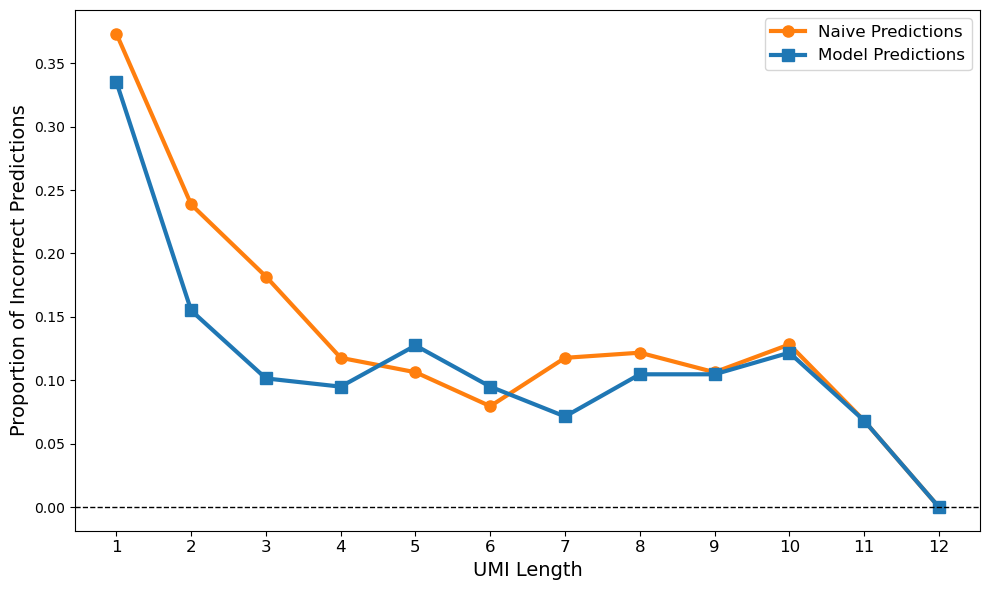

In [9]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define paths for regular and inverted annotated adata matrices
# regular_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices"
# inverted_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/inverted2_adata_matrices/cell_annotations/annotated_inv_matrices"

regular_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/cell_annotations/annotated_adata_matrices"
inverted_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/inverted2_adata_matrices/cell_annotations/annotated_inv_matrices"

# Load regular annotated adata matrices into a dictionary
annotated_ads_reg = {i: sc.read_h5ad(f"{regular_path}/annotated_adata_{i}.h5ad") for i in range(1, 13)}
# Use UMI 12 from the regular annotations as ground truth
ground_truth = annotated_ads_reg[12].obs['majority_voting'].astype(str).values

# Initialize error vector for regular annotations
error_vector_reg = np.zeros(12)
for i in range(1, 13):
    predictions_i = annotated_ads_reg[i].obs['majority_voting'].astype(str).values
    if len(predictions_i) != len(ground_truth):
        print(f"Warning: Length mismatch between UMI {i} and UMI 12 (regular).")
        continue
    error_vector_reg[i - 1] = np.mean(predictions_i != ground_truth)

# Load inverted annotated adata matrices into a dictionary
annotated_ads_inv = {i: sc.read_h5ad(f"{inverted_path}/annotated_adata_{i}.h5ad") for i in range(1, 13)}

# Initialize error vector for inverted annotations
error_vector_inv = np.zeros(12)
for i in range(1, 13):
    predictions_i = annotated_ads_inv[i].obs['majority_voting'].astype(str).values
    if len(predictions_i) != len(ground_truth):
        print(f"Warning: Length mismatch between UMI {i} and UMI 12 (inverted).")
        continue
    error_vector_inv[i - 1] = np.mean(predictions_i != ground_truth)

# Create a single figure for both error vectors
plt.figure(figsize=(10, 6))

# Plot the regular predictions error vector
plt.plot(range(1, 13), error_vector_reg, marker='o', linestyle='-', color='#ff7f0e', 
         label='Naive Predictions', markersize=8, linewidth=3)

# Plot the inverted matrices predictions error vector
plt.plot(range(1, 13), error_vector_inv, marker='s', linestyle='-', color='#1f77b4', 
         label='Model Predictions', markersize=8, linewidth=3)

plt.xlabel('UMI Length', fontsize=14)
plt.ylabel('Proportion of Incorrect Predictions', fontsize=14)
plt.xticks(range(1, 13), fontsize=12)
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.legend(fontsize=12)
plt.tight_layout()
# plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/figures_ub/celltypist_accuracy/1k_error_plot.pdf")
plt.show()

## 5. Confusion Matrices

Processing UMI length = 4 ...


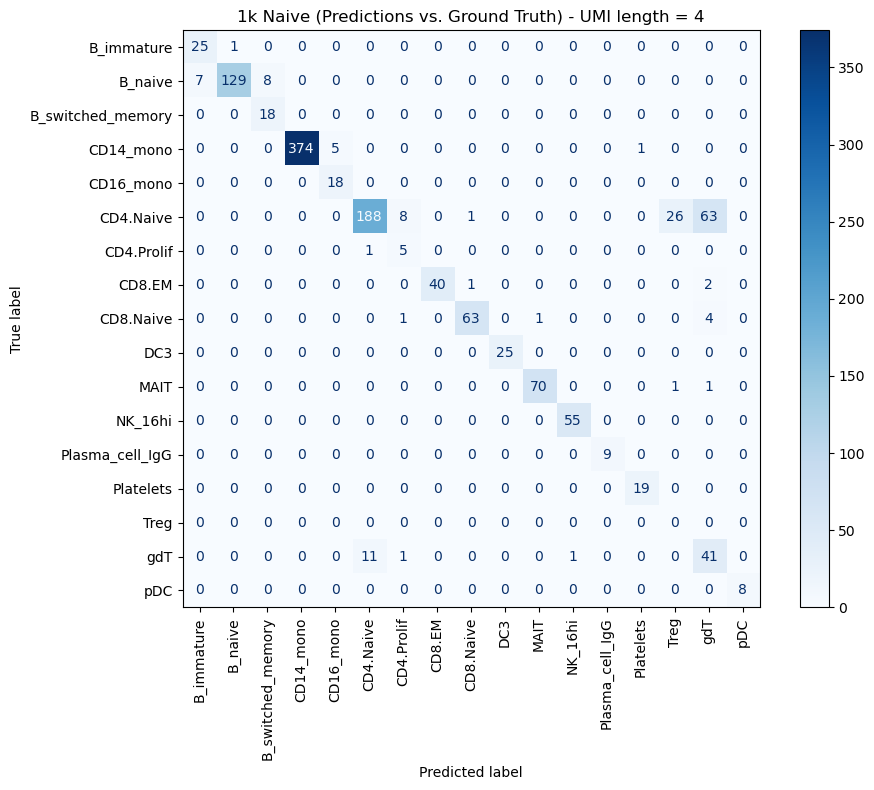

In [10]:
import os
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Common path where your annotated_adata_{i}.h5ad files are located
# naive_common_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices"
naive_common_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/cell_annotations/annotated_adata_matrices"

# The ground truth file (UMI length = 12)
ground_truth_file = os.path.join(naive_common_path, "annotated_adata_12.h5ad")
ground_truth_adata = sc.read_h5ad(ground_truth_file)

# Fixed UMI length
i = 4
print(f"Processing UMI length = {i} ...")

# Path to the annotated file for the current UMI length
naive_file = os.path.join(naive_common_path, f"annotated_adata_{i}.h5ad")

# Read the naive predictions for UMI length = i
naive_adata = sc.read_h5ad(naive_file)

# Align datasets based on cell names if necessary
if not all(naive_adata.obs_names == ground_truth_adata.obs_names):
    print(f"  Warning: Cell names do not match exactly for UMI length {i}. Aligning datasets using intersection.")
    common_cells = naive_adata.obs_names.intersection(ground_truth_adata.obs_names)
    naive_adata = naive_adata[common_cells].copy()
    gt_aligned = ground_truth_adata[common_cells].copy()
else:
    gt_aligned = ground_truth_adata

# Extract predicted (naive) and ground truth labels
y_pred = naive_adata.obs['majority_voting'].astype(str)
y_true = gt_aligned.obs['majority_voting'].astype(str)

# Get all labels present in either the predictions or the ground truth
labels = np.unique(np.concatenate([y_true, y_pred]))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Rotate x-axis labels by 90 degrees to make them vertical
plt.setp(ax.get_xticklabels(), rotation=90, ha="center")

plt.title(f"1k Naive (Predictions vs. Ground Truth) - UMI length = {i}")
plt.tight_layout()
plt.show()



Processing UMI length = 4 ...


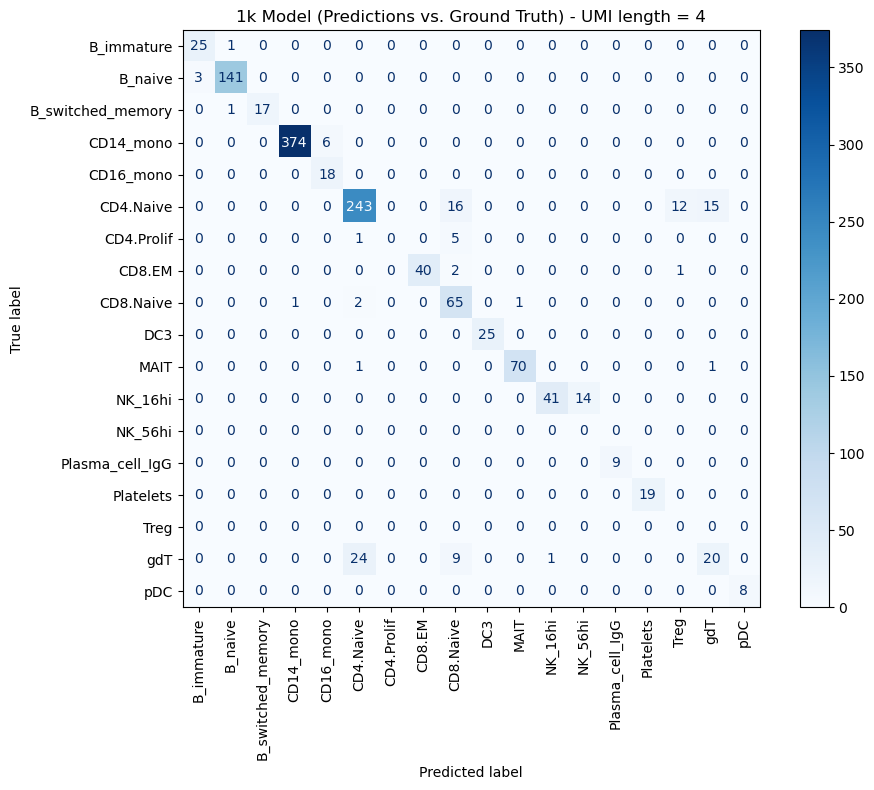

In [11]:
import os
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Common path where your annotated_adata_{i}.h5ad files are located
# naive_common_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/inverted2_adata_matrices/cell_annotations/annotated_inv_matrices"
naive_common_path = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/inverted2_adata_matrices/cell_annotations/annotated_inv_matrices"

# The ground truth file (UMI length = 12)
# ground_truth_file = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad"
ground_truth_file = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad"
ground_truth_adata = sc.read_h5ad(ground_truth_file)

# Fixed UMI length
i = 4
print(f"Processing UMI length = {i} ...")

# Path to the annotated file for the current UMI length
naive_file = os.path.join(naive_common_path, f"annotated_adata_{i}.h5ad")

# Read the naive predictions for UMI length = i
naive_adata = sc.read_h5ad(naive_file)

# Align datasets based on cell names if necessary
if not all(naive_adata.obs_names == ground_truth_adata.obs_names):
    print(f"  Warning: Cell names do not match exactly for UMI length {i}. Aligning datasets using intersection.")
    common_cells = naive_adata.obs_names.intersection(ground_truth_adata.obs_names)
    naive_adata = naive_adata[common_cells].copy()
    gt_aligned = ground_truth_adata[common_cells].copy()
else:
    gt_aligned = ground_truth_adata

# Extract predicted (naive) and ground truth labels
y_pred = naive_adata.obs['majority_voting'].astype(str)
y_true = gt_aligned.obs['majority_voting'].astype(str)

# Get all labels present in either the predictions or the ground truth
labels = np.unique(np.concatenate([y_true, y_pred]))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Rotate x-axis labels by 90 degrees to make them vertical
plt.setp(ax.get_xticklabels(), rotation=90, ha="center")

plt.title(f"1k Model (Predictions vs. Ground Truth) - UMI length = {i}")
plt.tight_layout()
# plt.savefig(f"/data/dagyeman/cellranger/bam_file_analysis/figures_ub/confusion_matrices/1k_model/confusion_matrix_UMI_{i}.pdf")
plt.show()


## 7. Custom Coloring UMAPs

### Naive - looking at CD4.Naive and gDT - UMI 3

... storing 'custom_color' as categorical


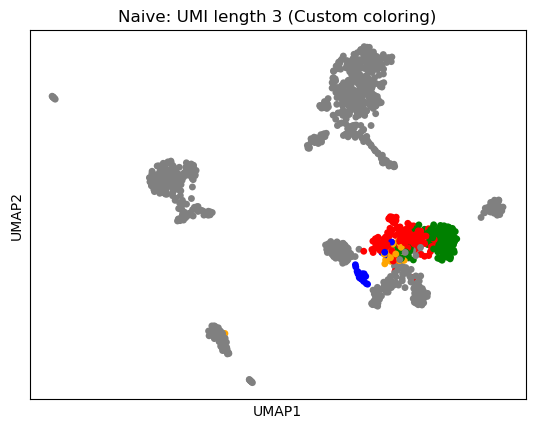

In [8]:
import os
import scanpy as sc
import celltypist

# Define UMI length to analyze
j = 3  # <-- Change this to any UMI length you want (1 to 12)


# Convert predictions to AnnData and compute UMAP
# annotated_adata = sc.read_h5ad(f"/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_{j}.h5ad")
annotated_adata = sc.read_h5ad(f"/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_{j}.h5ad")
sc.tl.umap(annotated_adata)

# Load the reference annotation (UMI length 12)
# reference_adata = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad")
reference_adata = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad")
reference_labels = reference_adata.obs['majority_voting']

# Assign ground truth labels from UMI-12 reference
annotated_adata.obs['reference_label'] = reference_labels.reindex(annotated_adata.obs_names)

# Define custom coloring logic
def assign_color(row):
    gt = row['reference_label']
    pred = row['majority_voting']
    
    if gt == "CD4.Naive":
        if pred == "CD4.Naive":
            return "CD4.Naive_correct"
        else:
            return "CD4.Naive_incorrect"
    elif gt == "gdT":
        if pred == "gdT":
            return "gdT_correct"
        else:
            return "gdT_incorrect"
    
    return "Other"

# Apply coloring
annotated_adata.obs['custom_color'] = annotated_adata.obs.apply(assign_color, axis=1)

# Define the color palette
custom_palette = {
    "CD4.Naive_correct": "green",
    "gdT_correct": "blue",
    "CD4.Naive_incorrect": "red",
    "gdT_incorrect": "orange",
    "Other": "gray"
}

# Plot the UMAP
sc.pl.umap(
    annotated_adata,
    color='custom_color',
    palette=custom_palette,
    legend_loc=None,  # <--- removes labels from appearing on the plot
    title=f"Naive: UMI length {j} (Custom coloring)",
    show=True,
    # save=f"_u{j}_custom_color.png"
)


### Model - looking at CD4.Naive and gDT - UMI 3

... storing 'custom_color' as categorical


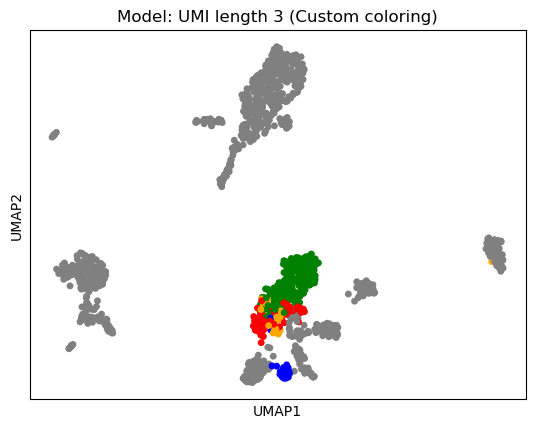

In [9]:
import os
import scanpy as sc
import celltypist

# Choose the UMI length you want to process
j = 3  # <- change this as needed

# annotated_adata = sc.read_h5ad(f"/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/inverted2_adata_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_{j}.h5ad")
annotated_adata = sc.read_h5ad(f"/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/inverted2_adata_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_{j}.h5ad")
sc.tl.umap(annotated_adata)

# Load the reference annotation (UMI length 12)
# reference_adata = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad")
reference_adata = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad")
reference_labels = reference_adata.obs['majority_voting']

# Assign ground truth labels to current object
annotated_adata.obs['reference_label'] = reference_labels.reindex(annotated_adata.obs_names)

# Updated custom color assignment
def assign_color(row):
    gt = row['reference_label']
    pred = row['majority_voting']
    
    if gt == "CD4.Naive":
        if pred == "CD4.Naive":
            return "CD4.Naive_correct"
        else:
            return "CD4.Naive_incorrect"
    elif gt == "gdT":
        if pred == "gdT":
            return "gdT_correct"
        else:
            return "gdT_incorrect"
    
    return "Other"

annotated_adata.obs['custom_color'] = annotated_adata.obs.apply(assign_color, axis=1)

# Updated custom color palette
custom_palette = {
    "CD4.Naive_correct": "green",
    "gdT_correct": "blue",
    "CD4.Naive_incorrect": "red",
    "gdT_incorrect": "orange",
    "Other": "gray"
}

sc.pl.umap(
    annotated_adata,
    color='custom_color',
    palette=custom_palette,
    legend_loc=None,  # <--- removes labels from appearing on the plot
    title=f"Model: UMI length {j} (Custom coloring)",
    show=True,
    # save=f"_u{j}_custom_color.png"
)



##### Naive - CD8.EM - UMI 3

... storing 'custom_color' as categorical


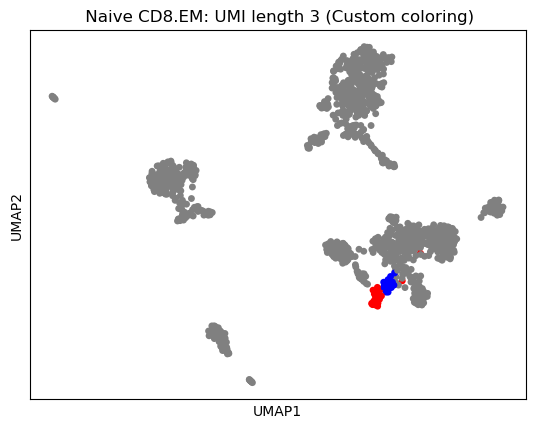

In [20]:
import os
import scanpy as sc
import celltypist

# Define UMI length to analyze
j = 3  # <-- Change this to any UMI length you want (1 to 12)

# Load the annotated AnnData and compute UMAP
annotated_adata = sc.read_h5ad(
    f"/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/"
    f"adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_{j}.h5ad"
)
sc.tl.umap(annotated_adata)

# Load the reference annotation (UMI length 12)
reference_adata = sc.read_h5ad(
    "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/"
    "adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad"
)
reference_labels = reference_adata.obs['majority_voting']

# Assign ground truth labels from UMI-12 reference
annotated_adata.obs['reference_label'] = reference_labels.reindex(annotated_adata.obs_names)

# --- MODIFIED: only look at CD8.EM ---
def assign_color(row):
    gt = row['reference_label']
    pred = row['majority_voting']
    
    if gt == "CD8.EM":
        if pred == "CD8.EM":
            return "CD8.EM_correct"
        else:
            return "CD8.EM_incorrect"
    return "Other"
# ----------------------

# Apply coloring
annotated_adata.obs['custom_color'] = annotated_adata.obs.apply(assign_color, axis=1)

# --- MODIFIED: new palette for CD8.EM ---
custom_palette = {
    "CD8.EM_correct": "blue",    # correctly predicted
    "CD8.EM_incorrect": "red",   # misclassified
    "Other": "gray"              # everything else
}
# ------------------------------------------

# Plot the UMAP
sc.pl.umap(
    annotated_adata,
    color='custom_color',
    palette=custom_palette,
    legend_loc=None,  
    title=f" Naive CD8.EM: UMI length {j} (Custom coloring)",
    show=True,
    # save=f"_u{j}_custom_color.png"
)

##### Model - CD8.EM - UMI 3

... storing 'custom_color' as categorical


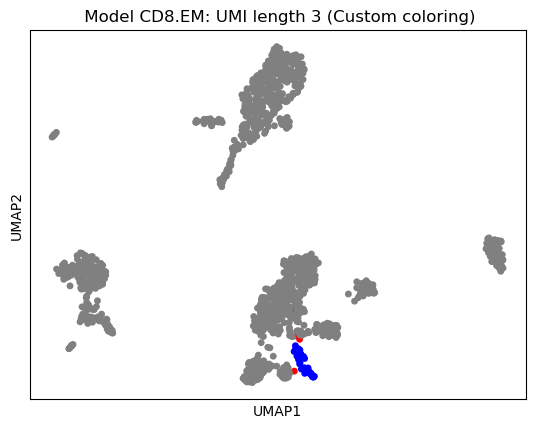

In [16]:
import os
import scanpy as sc
import celltypist

# Choose the UMI length you want to process
j = 3  # <- change this as needed

# Load the annotated AnnData and compute UMAP
annotated_adata = sc.read_h5ad(
    f"/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/"
    f"inverted2_adata_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_{j}.h5ad"
)
sc.tl.umap(annotated_adata)

# Load the reference annotation (UMI length 12)
reference_adata = sc.read_h5ad(
    "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/"
    "adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad"
)
reference_labels = reference_adata.obs['majority_voting']

# Assign ground truth labels to current object
annotated_adata.obs['reference_label'] = reference_labels.reindex(annotated_adata.obs_names)

# --- MODIFIED: only look at CD8.EM ---
def assign_color(row):
    gt = row['reference_label']
    pred = row['majority_voting']
    
    if gt == "CD8.EM":
        if pred == "CD8.EM":
            return "CD8.EM_correct"
        else:
            return "CD8.EM_incorrect"
    return "Other"
# -----------------------------------

annotated_adata.obs['custom_color'] = annotated_adata.obs.apply(assign_color, axis=1)

# --- MODIFIED: new palette for CD8.EM ---
custom_palette = {
    "CD8.EM_correct": "blue",    # correctly predicted CD8.EM
    "CD8.EM_incorrect": "red",   # CD8.EM misclassified
    "Other": "gray"              # all other cells
}
# -----------------------------------

sc.pl.umap(
    annotated_adata,
    color='custom_color',
    palette=custom_palette,
    legend_loc=None,
    title=f" Model CD8.EM: UMI length {j} (Custom coloring)",
    show=True,
    # save=f"_u{j}_custom_color.png"
)


##### Naive - CD4.NAIVE -UMI 4

... storing 'custom_color' as categorical


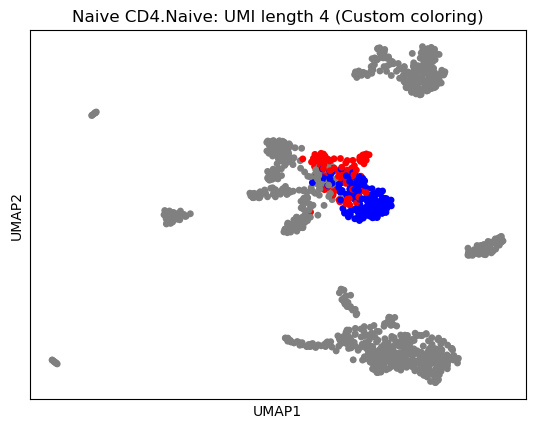

In [19]:
import os
import scanpy as sc
import celltypist

# Define UMI length to analyze
j = 4  # <-- Change this to any UMI length you want (1 to 12)

# Load the annotated AnnData and compute UMAP
annotated_adata = sc.read_h5ad(
    f"/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/"
    f"adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_{j}.h5ad"
)
sc.tl.umap(annotated_adata)

# Load the reference annotation (UMI length 12)
reference_adata = sc.read_h5ad(
    "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/"
    "adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad"
)
reference_labels = reference_adata.obs['majority_voting']

# Assign ground truth labels from UMI-12 reference
annotated_adata.obs['reference_label'] = reference_labels.reindex(annotated_adata.obs_names)

# --- MODIFIED: only look at CD4.Naive ---
def assign_color(row):
    gt = row['reference_label']
    pred = row['majority_voting']
    
    if gt == "CD4.Naive":
        if pred == "CD4.Naive":
            return "CD4.Naive_correct"
        else:
            return "CD4.Naive_incorrect"
    return "Other"
# ----------------------

# Apply coloring
annotated_adata.obs['custom_color'] = annotated_adata.obs.apply(assign_color, axis=1)

# --- MODIFIED: new palette for CD4.Naive ---
custom_palette = {
    "CD4.Naive_correct": "blue",    # correctly predicted CD4.Naive
    "CD4.Naive_incorrect": "red",   # CD4.Naive misclassified
    "Other": "gray"                 # everything else
}
# ------------------------------------------

# Plot the UMAP
sc.pl.umap(
    annotated_adata,
    color='custom_color',
    palette=custom_palette,
    legend_loc=None,  
    title=f"Naive CD4.Naive: UMI length {j} (Custom coloring)",
    show=True,
    # save=f"_u{j}_custom_color.png"
)



##### Model -  CD4.Naive = UMI 4

... storing 'custom_color' as categorical


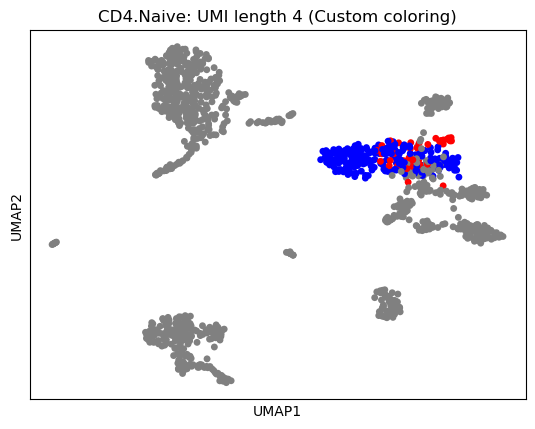

In [13]:
import os
import scanpy as sc
import celltypist

# Choose the UMI length you want to process
j = 4  # <- change this as needed

# Load the annotated AnnData and compute UMAP
annotated_adata = sc.read_h5ad(
    f"/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/"
    f"inverted2_adata_matrices/cell_annotations/annotated_inv_matrices/annotated_adata_{j}.h5ad"
)
sc.tl.umap(annotated_adata)

# Load the reference annotation (UMI length 12)
reference_adata = sc.read_h5ad(
    "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/"
    "adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad"
)
reference_labels = reference_adata.obs['majority_voting']

# Assign ground truth labels to current object
annotated_adata.obs['reference_label'] = reference_labels.reindex(annotated_adata.obs_names)

# --- MODIFIED: only look at CD4.Naive ---
def assign_color(row):
    gt = row['reference_label']
    pred = row['majority_voting']
    
    if gt == "CD4.Naive":
        if pred == "CD4.Naive":
            return "CD4.Naive_correct"
        else:
            return "CD4.Naive_incorrect"
    return "Other"
# -----------------------------------

annotated_adata.obs['custom_color'] = annotated_adata.obs.apply(assign_color, axis=1)

# --- MODIFIED: new palette for CD4.Naive ---
custom_palette = {
    "CD4.Naive_correct": "blue",      # correctly predicted CD4.Naive
    "CD4.Naive_incorrect": "red",     # CD4.Naive misclassified
    "Other": "gray"                   # all other cells
}
# -----------------------------------

sc.pl.umap(
    annotated_adata,
    color='custom_color',
    palette=custom_palette,
    legend_loc=None,
    title=f"CD4.Naive: UMI length {j} (Custom coloring)",
    show=True,
    # save=f"_u{j}_custom_color.png"
)
